<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/Product_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание


Задание 1. Предложите 3 метрики первого уровня для мобильного и интернет-банка. Почему именно эти? 

Задание 2. Вы хотите повысить конверсию на странице https://www.open.ru/credit_cards/120days, для этого вы хотите провести аб тест. Опишите процесс проведения аб (подготовка, запуск, итоги). Приведите в пример гипотезы, на которые вы будете опираться при тестировании страниц.


# Задание 1.

Предположим, что основной показатель банка (она же основная метрика) - это балансовая прибыль банка.     

Для чего люди используют мобильные и интернет-банки? Это удобно, это упрощает жизнь человеку, это быстро.     

Основные метрики первого уровня на мой взгляд:    

1) **Количество пользователей мобильного и интернет-банка.** Большое количество пользователей в цифровом продукте - это хорошо. Чем больше пользователей пользуется цифровым продуктом, тем больше вероятность увеличить прибыль банка.   
2) **Среднее количество транзакций на 1 пользователя.** Данная метрика позволяет определить насколько вообще эффективно работает мобильный или интернет-банк.     
3) **Средняя сумма транзакций**. Данный показатель показывает уровень доверия клиента к данному цифровому продукту, а ткаже показывает насколько в принципе развит данный продукт (удобен, понятен клиенту и т.д.).  


# Задание 2.

**Предположение**: Если поместить раздел "Преимущества вашей карты" перед разделом, где нужно заполнить контактные данные, то это повысит конверсию (т.е. большее количество людей оставит свои контактные данные).      
**Цель A/B теста**: Повысить конверсию за счет изменения структуры сайта (описание выше).   
**Метрика, которую будем оценивать**: Конверсия = Количество конверсий / Количество пользователей * 100%    
**Формируем гипотезы**:  
*   *Нулевая гипотеза (H0)*: изменение структуры сайта не повлияет на конверсию. Конверсии для группы A и B на самом деле не отличаются, и наблюдаемые различия случайны.
*   *Альтернативная гипотеза (H1)*: изменение структуры сайта повлияет на конверсию. Конверсии для группы A и B отличаются.    

**Что ожидаем увидеть**: Что изменение структуры сайта увеличит конверсию с 5% до 7%.






**Настройка A/B теста**:    
Определим размер выборки, который нам потребуется для теста. Воспользуемся калькулятором.

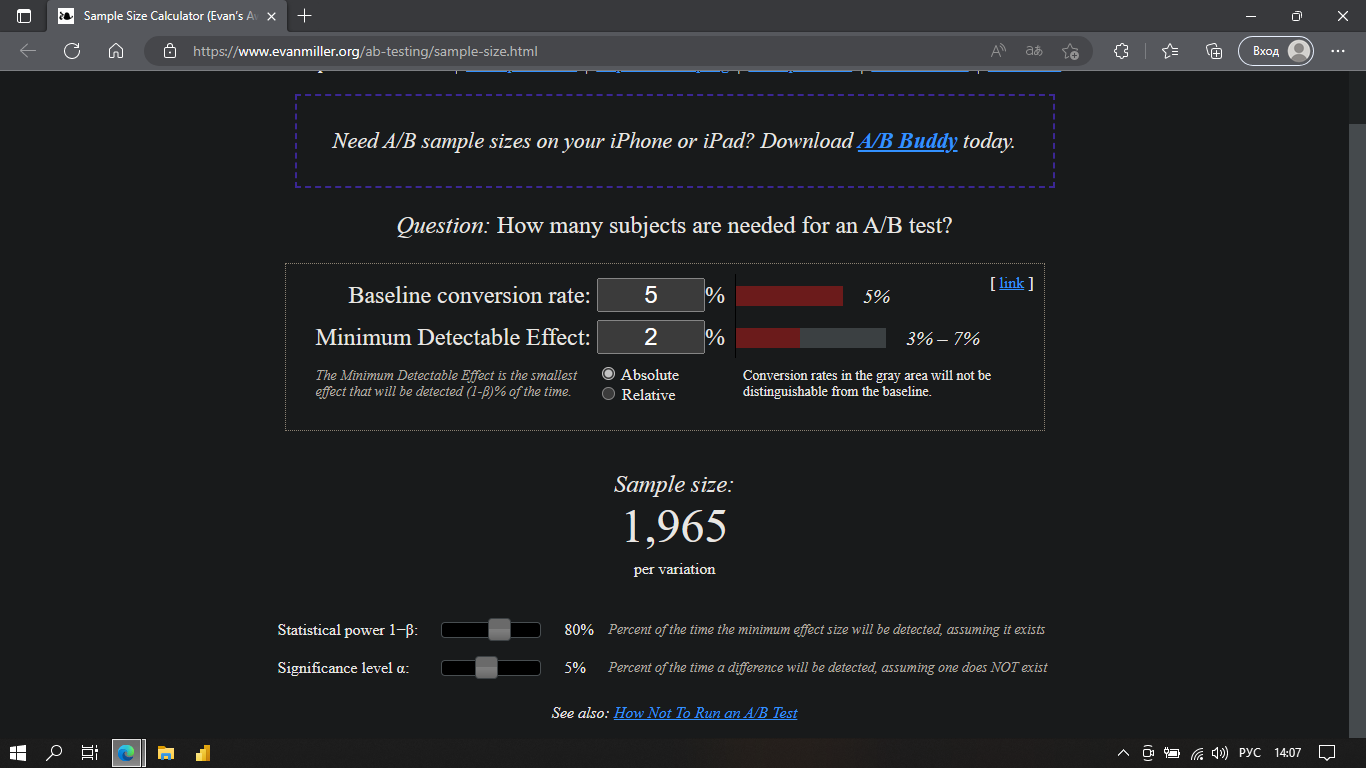

Базовый уровень конверссии = 5%
MDE = 2%
Мощность теста = 80%
Вероятность ошибки 1-го рода = 5%

В итоге размер каждой группы должен быть минимум 1965 пользователей.
Допустим в день на каждый вариант сайта заходит по 200 человек. Общее количество пользователей необходимое для завершения теста = 4000 пользоватлей.   
**Соответственно необходимое количество дней для A/B теста = 10 дней.**

Поделим группы в соотношении 50/50. Т.е. 50% пользователей будет показываться старый сайт (контрольная группа, А). А второй половине будет показываться новый сайт (тестовая группа, B).

Чтобы убедиться, что пользоватлеи из двух групп взяты из одной генеральной совокупности, проведем A/A тест.(Двум группа показывают один и тот же сайт.)   

Предположим, что A/A тест проведен. Статистически значимых различий не выявлено. Соответственно можно проводить A/B тест.

 **Проводим эксперимент**:

In [28]:
import pandas as pd
import numpy as np

Округлим число пользователей в каждой группе до 2000.

In [33]:
a = np.random.binomial(1,0.05,2000)
b = np.random.binomial(1,0.07,2000)

In [38]:
f'Число конверсий в группе A (контрольной) = {np.sum(a)}'

'Число конверсий в группе A (контрольной) = 88'

In [39]:
f'Число конверсий в группе B (тестовой) = {np.sum(b)}'

'Число конверсий в группе B (тестовой) = 125'

**Результаты A/B теста:**

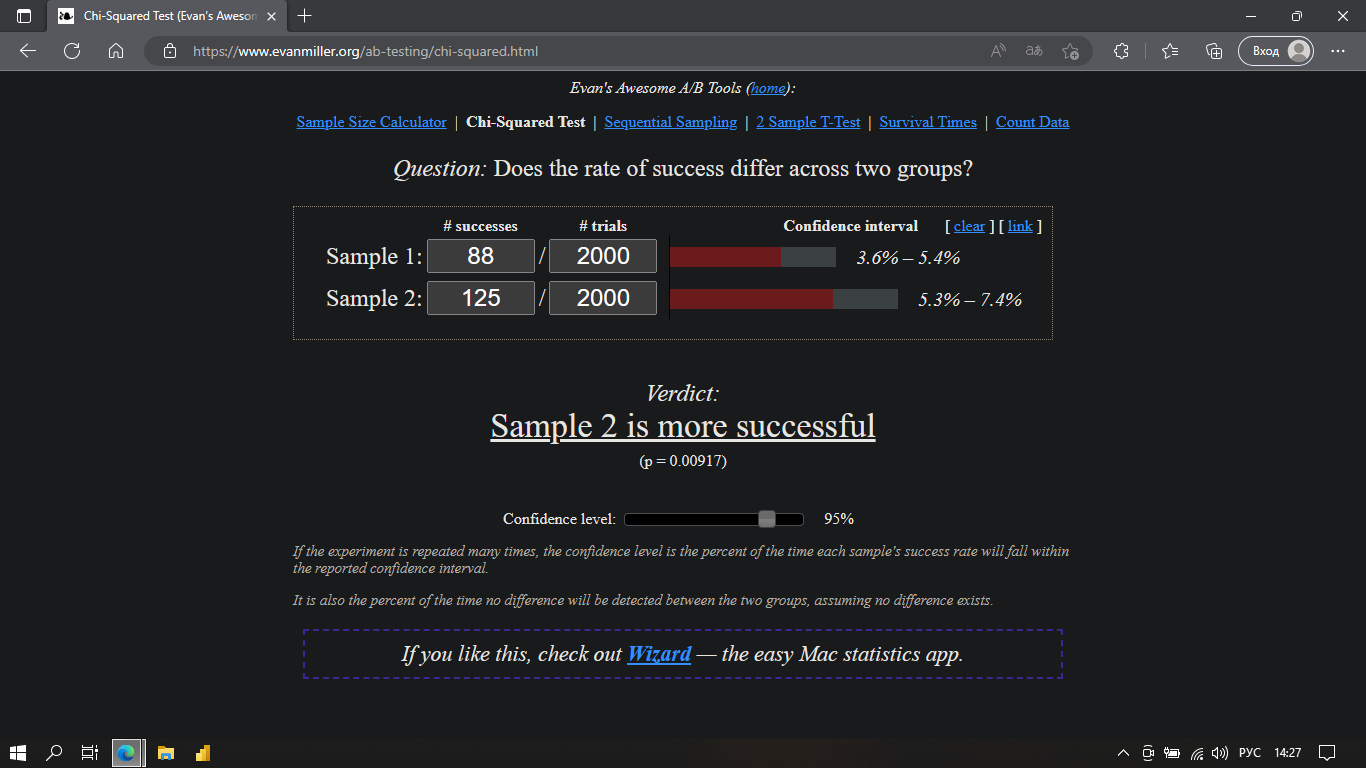

In [48]:
f'Коэффициент конверсии в группе A (контрольной) = {round(np.mean(a)*100, 2)}%'

'Коэффициент конверсии в группе A (контрольной) = 4.4%'

In [49]:
f'Коэффициент конверсии в группе B (тестовой) = {round(np.mean(b)*100, 2)}%'

'Коэффициент конверсии в группе B (тестовой) = 6.25%'

In [50]:
(6.25-4.4)/4.4

0.42045454545454536

Коэффициент конверсии в группе В на 42% выше, чем коэффициент конверсии в группе A. Этот результат — следствие внесенных изменений, а не случайность. Уровень доверия 95%.
Рекомендуем применить настройки группы В для всех пользователей.

In [64]:
from statsmodels.stats.proportion import proportions_ztest

In [65]:
proportions_ztest([88,125], [2000,2000])

(-2.6055191258015604, 0.009173515184714785)